## Objective

I want to create a model that can predict if the assessed customer is bad or good based on several parameters described below. The dataset used for training was taken from https://www.openml.org/d/31 and I use two different methods for this as comparison, using unsupervised (autosklearn) and supervised (decision trees). Because of interpretability consideration, I decided to choose the decision trees as the final model. This is my first time to create the machine learning from end to end besides previous homeworks and lessons, so I am certain that there are so many flaws on my analysis and methods. Need input from this. Thank you.

### Attribute description   
1. checking_status: Status of existing checking account, in Deutsche Mark.  
2. duration: Duration in months  
3. credit_history: Credit history (credits taken, paid back duly, delays, critical accounts)  
4. purpose: Purpose of the credit (car, television,...)  
5. credit_amount: Credit amount  
6. savings_status: Status of savings account/bonds, in Deutsche Mark.  
7. employment: Present employment, in number of years.  
8. installment_commitment: Installment rate in percentage of disposable income  
9. personal_status: Personal status (married, single,...) and sex  
10. other_parties: Other debtors / guarantors  
11. residence_since: Present residence since X years  
12. property_magnitude: Property (e.g. real estate)  
13. age: Age in years  
14. other_payment_plans: Other installment plans (banks, stores)  
15. housing: Housing (rent, own,...)  
16. existing_credits: Number of existing credits at this bank  
17. job: Job  
18. num_dependents: Number of people being liable to provide maintenance for  
19. own_telephone: Telephone (yes,no)  
20. foreign_worker: Foreign worker (yes,no)

## EDA

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/Users/tonygunawan/Downloads/dataset_31_credit-g.csv', decimal=',')

In [4]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [5]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
df.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [7]:
df['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='class', ylabel='Count'>

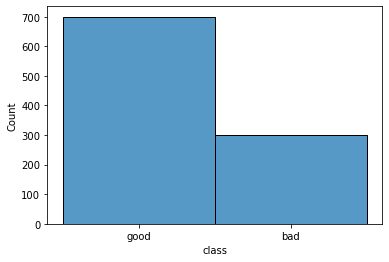

In [9]:
sns.histplot(df['class'], bins=50)

In [10]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [11]:
categorical = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 
              'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 
               'housing', 'job', 'own_telephone', 'foreign_worker']

In [12]:
numerical = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age',
            'existing_credits', 'num_dependents']

## Setting Up The Validation Framework

In [22]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=10)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=10)

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
y_train = (df_train['class'] == 'bad').astype('int').values
y_val = (df_val['class'] == 'bad').astype('int').values
y_test = (df_test['class'] == 'bad').astype('int').values

In [25]:
y_train.mean()

0.31

In [26]:
y_val.mean()

0.26

In [27]:
y_test.mean()

0.31

In [18]:
del df_train['class']
del df_val['class']
del df_test['class']

In [19]:
df_full_train['class'].value_counts()

good    562
bad     238
Name: class, dtype: int64

In [20]:
df_full_train['class'].value_counts(normalize=True)

good    0.7025
bad     0.2975
Name: class, dtype: float64

In [21]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.to_dict(orient = 'records')

In [19]:
train_dicts[:5]

[{'checking_status': "'<0'",
  'duration': 36,
  'credit_history': "'critical/other existing credit'",
  'purpose': 'education',
  'credit_amount': 8065,
  'savings_status': "'<100'",
  'employment': "'1<=X<4'",
  'installment_commitment': 3,
  'personal_status': "'female div/dep/mar'",
  'other_parties': 'none',
  'residence_since': 2,
  'property_magnitude': "'no known property'",
  'age': 25,
  'other_payment_plans': 'none',
  'housing': 'own',
  'existing_credits': 2,
  'job': "'high qualif/self emp/mgmt'",
  'num_dependents': 1,
  'own_telephone': 'yes',
  'foreign_worker': 'yes'},
 {'checking_status': "'no checking'",
  'duration': 24,
  'credit_history': "'existing paid'",
  'purpose': 'radio/tv',
  'credit_amount': 1413,
  'savings_status': "'<100'",
  'employment': "'1<=X<4'",
  'installment_commitment': 4,
  'personal_status': "'male mar/wid'",
  'other_parties': 'none',
  'residence_since': 2,
  'property_magnitude': "'life insurance'",
  'age': 28,
  'other_payment_plans': 

In [20]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [21]:
X_train

array([[25.,  0.,  1., ...,  1.,  0.,  0.],
       [28.,  0.,  0., ...,  1.,  0.,  0.],
       [33.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [33.,  1.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  1.,  0.,  0.],
       [21.,  0.,  1., ...,  1.,  0.,  0.]])

In [22]:
dv.get_feature_names()

['age',
 "checking_status='0<=X<200'",
 "checking_status='<0'",
 "checking_status='>=200'",
 "checking_status='no checking'",
 'credit_amount',
 "credit_history='all paid'",
 "credit_history='critical/other existing credit'",
 "credit_history='delayed previously'",
 "credit_history='existing paid'",
 "credit_history='no credits/all paid'",
 'duration',
 "employment='1<=X<4'",
 "employment='4<=X<7'",
 "employment='<1'",
 "employment='>=7'",
 'employment=unemployed',
 'existing_credits',
 'foreign_worker=no',
 'foreign_worker=yes',
 "housing='for free'",
 'housing=own',
 'housing=rent',
 'installment_commitment',
 "job='high qualif/self emp/mgmt'",
 "job='unemp/unskilled non res'",
 "job='unskilled resident'",
 'job=skilled',
 'num_dependents',
 "other_parties='co applicant'",
 'other_parties=guarantor',
 'other_parties=none',
 'other_payment_plans=bank',
 'other_payment_plans=none',
 'other_payment_plans=stores',
 'own_telephone=none',
 'own_telephone=yes',
 "personal_status='female div

## Feature Importance: Mutual Information

In [23]:
from sklearn.metrics import mutual_info_score

In [24]:
def mutual_info_bad_score(series):
    return mutual_info_score(series, df_full_train['class'])

In [25]:
mi = df_full_train[categorical].apply(mutual_info_bad_score)
mi.sort_values(ascending=False)

checking_status        0.068698
credit_history         0.026678
savings_status         0.020226
purpose                0.014132
employment             0.012263
property_magnitude     0.008933
other_payment_plans    0.007642
housing                0.005749
other_parties          0.005018
personal_status        0.003406
foreign_worker         0.002906
job                    0.002038
own_telephone          0.000462
dtype: float64

## Feature Importance: Correlation

In [26]:
df_full_train[numerical].describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,21.042500,3297.265000,2.968750,2.847500,35.443750,1.406250,1.156250
std,12.108115,2817.713676,1.127769,1.103751,11.464778,0.582353,0.363319
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1374.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2324.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4119.500000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [40]:
df_full_train[numerical].corrwith((df_full_train['class']=='bad').astype(int))

duration                  0.188880
credit_amount             0.128087
installment_commitment    0.068990
residence_since          -0.016620
age                      -0.073887
existing_credits         -0.026721
num_dependents           -0.008943
dtype: float64

## Modeling Using Autosklearn

In [28]:
import autosklearn

In [29]:
print('autosklearn: %s' % autosklearn.__version__)

autosklearn: 0.14.0


In [30]:
## define search
from sklearn.metrics import accuracy_score
from autosklearn.classification import AutoSklearnClassifier

model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=-1, memory_limit=None)

In [31]:
# perform the search
model.fit(X_train, y_train)

AutoSklearnClassifier(memory_limit=None, n_jobs=-1, per_run_time_limit=30,
                      time_left_for_this_task=120)

In [32]:
# summarize
print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: d03b3be4-3a3d-11ec-8807-acde48001122
  Metric: accuracy
  Best validation score: 0.717172
  Number of target algorithm runs: 27
  Number of successful target algorithm runs: 26
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0



In [33]:
# evaluate best model

test_dicts = df_test.to_dict(orient = 'records')
dv = DictVectorizer(sparse=False)
X_val = dv.fit_transform(test_dicts)

In [34]:
dv.get_feature_names()

['age',
 "checking_status='0<=X<200'",
 "checking_status='<0'",
 "checking_status='>=200'",
 "checking_status='no checking'",
 'credit_amount',
 "credit_history='all paid'",
 "credit_history='critical/other existing credit'",
 "credit_history='delayed previously'",
 "credit_history='existing paid'",
 "credit_history='no credits/all paid'",
 'duration',
 "employment='1<=X<4'",
 "employment='4<=X<7'",
 "employment='<1'",
 "employment='>=7'",
 'employment=unemployed',
 'existing_credits',
 'foreign_worker=no',
 'foreign_worker=yes',
 "housing='for free'",
 'housing=own',
 'housing=rent',
 'installment_commitment',
 "job='high qualif/self emp/mgmt'",
 "job='unemp/unskilled non res'",
 "job='unskilled resident'",
 'job=skilled',
 'num_dependents',
 "other_parties='co applicant'",
 'other_parties=guarantor',
 'other_parties=none',
 'other_payment_plans=bank',
 'other_payment_plans=none',
 'other_payment_plans=stores',
 'own_telephone=none',
 'own_telephone=yes',
 "personal_status='female div

In [35]:
X_val

array([[28.,  0.,  0., ...,  1.,  0.,  0.],
       [49.,  0.,  0., ...,  0.,  0.,  1.],
       [61.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [46.,  1.,  0., ...,  1.,  0.,  0.],
       [30.,  0.,  0., ...,  0.,  0.,  1.],
       [44.,  0.,  0., ...,  1.,  0.,  0.]])

In [36]:
y_pred = model.predict(X_val)

In [37]:
acc = accuracy_score(y_test, y_pred)
print('accuracy: %.3f' %acc)

accuracy: 0.750


## Modeling Using Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [90]:
df_train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'<0',36,'critical/other existing credit',education,8065,'<100','1<=X<4',3,'female div/dep/mar',none,2,'no known property',25,none,own,2,'high qualif/self emp/mgmt',1,yes,yes
1,'no checking',24,'existing paid',radio/tv,1413,'<100','1<=X<4',4,'male mar/wid',none,2,'life insurance',28,none,own,1,skilled,1,none,yes
2,'0<=X<200',9,'existing paid','new car',3195,'no known savings','1<=X<4',1,'female div/dep/mar',none,2,'real estate',33,none,own,1,'unskilled resident',1,none,yes
3,'0<=X<200',36,'delayed previously','new car',2862,'100<=X<500','>=7',4,'male single',none,3,'no known property',30,none,'for free',1,skilled,1,none,yes
4,'0<=X<200',48,'no credits/all paid',business,12204,'no known savings','1<=X<4',2,'male single',none,2,car,48,bank,own,1,'high qualif/self emp/mgmt',1,yes,yes


In [91]:
train_dicts = df_train.to_dict(orient='records')

In [92]:
train_dicts[:5]

[{'checking_status': "'<0'",
  'duration': 36,
  'credit_history': "'critical/other existing credit'",
  'purpose': 'education',
  'credit_amount': 8065,
  'savings_status': "'<100'",
  'employment': "'1<=X<4'",
  'installment_commitment': 3,
  'personal_status': "'female div/dep/mar'",
  'other_parties': 'none',
  'residence_since': 2,
  'property_magnitude': "'no known property'",
  'age': 25,
  'other_payment_plans': 'none',
  'housing': 'own',
  'existing_credits': 2,
  'job': "'high qualif/self emp/mgmt'",
  'num_dependents': 1,
  'own_telephone': 'yes',
  'foreign_worker': 'yes'},
 {'checking_status': "'no checking'",
  'duration': 24,
  'credit_history': "'existing paid'",
  'purpose': 'radio/tv',
  'credit_amount': 1413,
  'savings_status': "'<100'",
  'employment': "'1<=X<4'",
  'installment_commitment': 4,
  'personal_status': "'male mar/wid'",
  'other_parties': 'none',
  'residence_since': 2,
  'property_magnitude': "'life insurance'",
  'age': 28,
  'other_payment_plans': 

In [93]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [94]:
X_train

array([[25.,  0.,  1., ...,  1.,  0.,  0.],
       [28.,  0.,  0., ...,  1.,  0.,  0.],
       [33.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [33.,  1.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  1.,  0.,  0.],
       [21.,  0.,  1., ...,  1.,  0.,  0.]])

In [95]:
dv.get_feature_names()

['age',
 "checking_status='0<=X<200'",
 "checking_status='<0'",
 "checking_status='>=200'",
 "checking_status='no checking'",
 'credit_amount',
 "credit_history='all paid'",
 "credit_history='critical/other existing credit'",
 "credit_history='delayed previously'",
 "credit_history='existing paid'",
 "credit_history='no credits/all paid'",
 'duration',
 "employment='1<=X<4'",
 "employment='4<=X<7'",
 "employment='<1'",
 "employment='>=7'",
 'employment=unemployed',
 'existing_credits',
 'foreign_worker=no',
 'foreign_worker=yes',
 "housing='for free'",
 'housing=own',
 'housing=rent',
 'installment_commitment',
 "job='high qualif/self emp/mgmt'",
 "job='unemp/unskilled non res'",
 "job='unskilled resident'",
 'job=skilled',
 'num_dependents',
 "other_parties='co applicant'",
 'other_parties=guarantor',
 'other_parties=none',
 'other_payment_plans=bank',
 'other_payment_plans=none',
 'other_payment_plans=stores',
 'own_telephone=none',
 'own_telephone=yes',
 "personal_status='female div

In [96]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [98]:
y_pred = dt.predict_proba(X_val)[:, 1]
y_pred

array([1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [99]:
roc_auc_score(y_val, y_pred)

0.6476091476091477

In [116]:
xi = df_train.iloc[0].to_dict()
xi

{'checking_status': "'<0'",
 'duration': 36,
 'credit_history': "'critical/other existing credit'",
 'purpose': 'education',
 'credit_amount': 8065,
 'savings_status': "'<100'",
 'employment': "'1<=X<4'",
 'installment_commitment': 3,
 'personal_status': "'female div/dep/mar'",
 'other_parties': 'none',
 'residence_since': 2,
 'property_magnitude': "'no known property'",
 'age': 25,
 'other_payment_plans': 'none',
 'housing': 'own',
 'existing_credits': 2,
 'job': "'high qualif/self emp/mgmt'",
 'num_dependents': 1,
 'own_telephone': 'yes',
 'foreign_worker': 'yes'}

In [101]:
y_train[0]

1

In [102]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [103]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [104]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:' , auc)

train: 0.7109241078385539
val: 0.7487655925155925


In [105]:
from sklearn.tree import export_text

In [106]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- checking_status='no checking' <= 0.50
|   |--- duration <= 11.50
|   |   |--- class: 0
|   |--- duration >  11.50
|   |   |--- class: 0
|--- checking_status='no checking' >  0.50
|   |--- credit_amount <= 3615.00
|   |   |--- class: 0
|   |--- credit_amount >  3615.00
|   |   |--- class: 0



## Decision Trees Parameter Tuning

In [107]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.709
   2 -> 0.749
   3 -> 0.785
   4 -> 0.782
   5 -> 0.774
   6 -> 0.763
  10 -> 0.693
  15 -> 0.653
  20 -> 0.654
None -> 0.635


In [108]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf = s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

In [109]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4.0,1,0.782030
1,4.0,2,0.782030
2,4.0,5,0.766827
3,4.0,10,0.778456
4,4.0,15,0.774688


In [110]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
39,10.0,10,0.816528
56,20.0,5,0.815683
57,20.0,10,0.813734
66,NaN,10,0.811915
12,5.0,10,0.810291


In [111]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.642  0.782  0.762  0.770  0.730  0.689  0.676  0.684
2                 0.674  0.782  0.767  0.757  0.722  0.675  0.656  0.646
5                 0.761  0.767  0.773  0.790  0.780  0.782  0.792  0.816
10                0.812  0.778  0.810  0.797  0.804  0.817  0.808  0.814
15                0.787  0.775  0.798  0.766  0.781  0.789  0.785  0.802
20                0.778  0.775  0.760  0.783  0.778  0.778  0.778  0.778
100               0.784  0.784  0.784  0.784  0.784  0.784  0.784  0.784
200               0.709  0.709  0.709  0.709  0.709  0.709  0.709  0.709
500               0.500  0.500  0.500  0.500  0.500  0.500  0.500  0.500

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

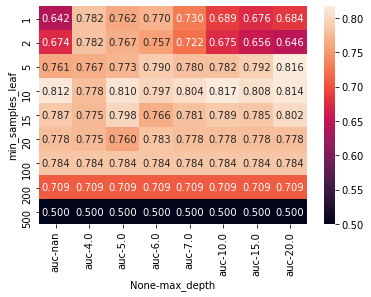

In [112]:
sns.heatmap(df_scores_pivot, annot=True, fmt = '.3f')

In [113]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

In [122]:
import pickle 

with open('predict-model.bin', 'wb') as f_out:
    pickle.dump(dt, f_out)
    
with open('dv.bin', 'wb') as f_out:
    pickle.dump(dv, f_out)

In [118]:
customer = {
'checking_status': "'<0'",
 'duration': 36,
 'credit_history': "'critical/other existing credit'",
 'purpose': 'education',
 'credit_amount': 8065,
 'savings_status': "'<100'",
 'employment': "'1<=X<4'",
 'installment_commitment': 3,
 'personal_status': "'female div/dep/mar'",
 'other_parties': 'none',
 'residence_since': 2,
 'property_magnitude': "'no known property'",
 'age': 25,
 'other_payment_plans': 'none',
 'housing': 'own',
 'existing_credits': 2,
 'job': "'high qualif/self emp/mgmt'",
 'num_dependents': 1,
 'own_telephone': 'yes',
 'foreign_worker': 'yes'
}

In [125]:
import requests
url = 'http://localhost:9698/predict'
response = requests.post(url, json=customer)
result = response.json()
result

{'bad': True, 'bad_probability': 0.9411764705882353}